In [1]:
import sys
sys.path.append('..')

In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
from Hamiltonians import Heisenberg, MagneticField, HeisenbergAnisotropic, XY, Kitaev
import netket as nk
import jax.numpy as jnp

In [2]:
image_path = Path('./ThesisGraphics')

In [3]:
L = 6
# graph = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
graph = nk.graph.Triangular(extent=[3, 2], pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, N=graph.n_nodes)

In [4]:
heisenberg = Heisenberg(hilbert=hilbert, graph=graph, J=1.)
xy = XY(hilbert=hilbert, graph=graph, J=1, delta=(0.8, 0.2))
heisenberg_xxz = HeisenbergAnisotropic(hilbert=hilbert, graph=graph, J=1., delta=0.1)
heisenberg_xyz = Heisenberg(hilbert=hilbert, graph=graph, J=(0.9, 0.1, 0.1))
h = MagneticField(hilbert=hilbert, graph=graph, h=(-5., 0., -5.), dtype=jnp.float32)

C:\Users\thejg\Desktop\Programming\projects39\lib\site-packages\netket\operator\_local_operator\helpers.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  return matrix.astype(dtype)


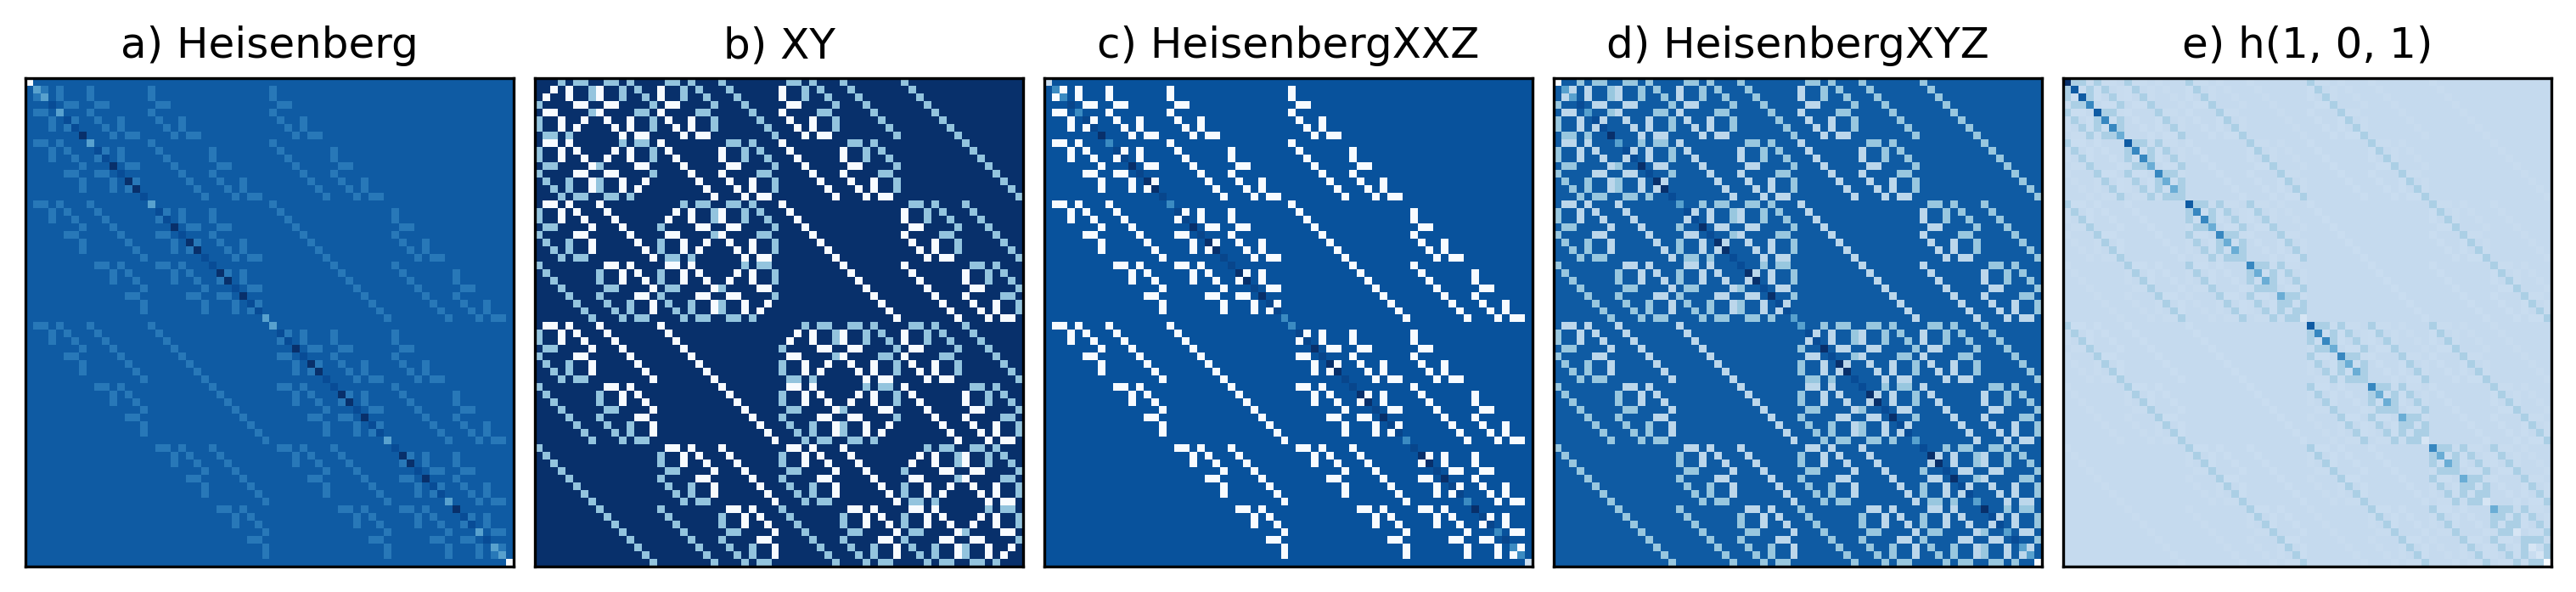

In [5]:
figure, axes = plt.subplots(1, 5, layout='constrained', figsize=(10, 2.5), dpi=300)
hamiltonians = [heisenberg, xy, heisenberg_xxz, heisenberg_xyz, xy + h]
titles = ['a) Heisenberg', 'b) XY', 'c) HeisenbergXXZ', 'd) HeisenbergXYZ', 'e) h(1, 0, 1)']
for hamiltonian, title, ax in zip(hamiltonians, titles, figure.axes):
    ax.imshow(hamiltonian.to_dense(), interpolation='nearest', cmap='Blues')
    ax.set(xticks=[], yticks=[], title=title)
figure.savefig(image_path / f'HamiltonianComparison.png')